# <center> KIDNEY DISEASE ANALYSIS

In [1]:
## imporitng libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('kidney_disease_Original.csv', index_col = 0)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

Checking the unique values in each column to check if there is any error.

In [4]:
x= data.columns
x= list(x)
for i in x:
    print(i)
    print(data[i].unique())
    print(' ')

age
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
 
bp
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
 
sg
[1.02  1.01  1.005 1.015   nan 1.025]
 
al
[ 1.  4.  2.  3.  0. nan  5.]
 
su
[ 0.  3.  4.  1. nan  2.  5.]
 
rbc
[nan 'normal' 'abnormal']
 
pc
['normal' 'abnormal' nan]
 
pcc
['notpresent' 'present' nan]
 
ba
['notpresent' 'present' nan]
 
bgr
[121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153

We can see, there are some special characters and \t within few columns, to fix them let's use replace command.  

In [5]:
data.pcv = data.pcv.replace('\t43','43')
data.pcv = data.pcv.replace('\t?',np.nan)
data.wc = data.wc.replace('\t6200','6200')
data.wc = data.wc.replace('\t8400','8400')
data.wc = data.wc.replace('\t?',np.nan)
data.dm = data.dm.replace(' yes','yes')
data.dm = data.dm.replace('\tno','no')
data.dm = data.dm.replace('\tyes','yes')
data.cad = data.cad.replace('\tno','no')
data.classification = data.classification.replace('ckd\t','ckd')
data.rc = data.rc.replace('\t?', np.nan)

In [6]:
x= data.columns
x= list(x)
for i in x:
    print(i)
    print(data[i].unique())
    print(' ')

age
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
 
bp
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
 
sg
[1.02  1.01  1.005 1.015   nan 1.025]
 
al
[ 1.  4.  2.  3.  0. nan  5.]
 
su
[ 0.  3.  4.  1. nan  2.  5.]
 
rbc
[nan 'normal' 'abnormal']
 
pc
['normal' 'abnormal' nan]
 
pcc
['notpresent' 'present' nan]
 
ba
['notpresent' 'present' nan]
 
bgr
[121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153

In [7]:
data['pcv'] = pd.to_numeric(data['pcv'])
data['wc'] = pd.to_numeric(data['wc'])
data['rc'] = pd.to_numeric(data['rc'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

Checking if the errors have been removed

In [9]:
def col_catego_numeri(data):
    catego_col = [col for col in data.columns if data[col].dtype == object]
    numeri_col = [col for col in data.columns if data[col].dtype != object]
    return catego_col, numeri_col

In [10]:
catego_col, numeri_col = col_catego_numeri(data)

In [11]:
catego_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [12]:
numeri_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

To find the exact number of rows and columns, we will use the Shape function.

In [13]:
data.shape

(400, 25)

In [14]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [15]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


DATA CLEANING

In [16]:
# x = data.isnull().sum()
x = pd.DataFrame( {'Factors':data.columns, 'Null_Values': data.isnull().sum()}, )

In [17]:
sorted_x = x.sort_values(by='Null_Values', ascending=False, ignore_index=any )

Text(0, 0.5, 'Null Values Count')

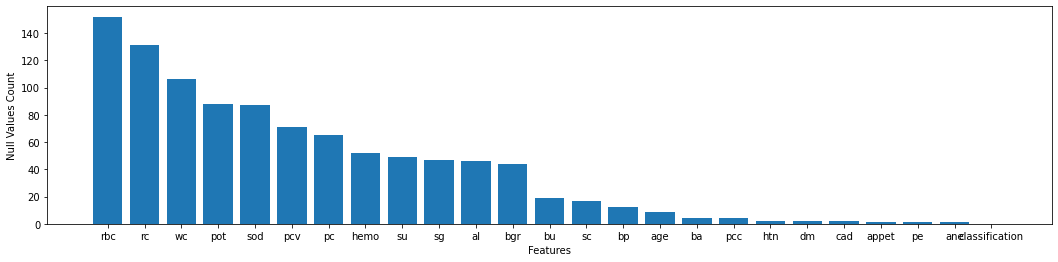

In [18]:
fig = plt.figure(figsize=(18,4))
plt.bar(sorted_x.Factors,sorted_x.Null_Values)
plt.xlabel('Features')
plt.ylabel('Null Values Count')

In [19]:
data.groupby('classification').mean()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
classification,,,,,,,,,,,,,,
ckd,54.541322,79.625000,1.013918,1.722488,0.76699,175.419811,72.389030,4.414916,133.901786,4.878443,10.647549,32.939891,9069.536424,3.945238
notckd,46.516779,71.351351,1.022414,0.000000,0.00000,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194,46.335616,7705.594406,5.379021


In [20]:
data['classification'] = data['classification'].replace({'ckd':1, 'notckd':0})
data['pc'] = data['pc'].replace({'normal':1, 'abnormal':0})
data['pcc'] = data['pcc'].replace({'present':1, 'notpresent':0})
data['ba'] = data['ba'].replace({'present':1, 'notpresent':0})
data['htn'] = data['htn'].replace({'yes':1, 'no':0})
data['dm'] = data['dm'].replace({'yes':1, 'no':0})
data['cad'] = data['cad'].replace({'yes':1, 'no':0})
data['appet'] = data['appet'].replace({'good':1, 'poor':0})
data['pe'] = data['pe'].replace({'yes':1, 'no':0})
data['ane'] = data['ane'].replace({'yes':1, 'no':0})

In [21]:
df = data.drop(['rbc','rc','wc'], axis=1)

In [22]:
df.head(1)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.02,1.0,0.0,1.0,0.0,0.0,121.0,36.0,...,NaN,15.4,44.0,1.0,1.0,0.0,1.0,0.0,0.0,1


In [23]:
df.isnull().sum()

age                9
bp                12
sg                47
al                46
su                49
pc                65
pcc                4
ba                 4
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv               71
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [24]:
columns_with_nulls = ['age', 'bp', 'sg', 'al', 'su', 'pc','pcc','ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'htn',
                     'dm', 'cad', 'appet', 'pe', 'ane']

for column in columns_with_nulls:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [25]:
X = df.drop(['classification'], axis=1)
Y = df['classification']

Data Standardization

In [26]:
scaler = StandardScaler()
scaler.fit(X)

standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.21003135  0.25421378  0.4214856  ...  0.50780078 -0.4843221
  -0.42008403]
 [-2.62723421 -1.97247624  0.4214856  ...  0.50780078 -0.4843221
  -0.42008403]
 [ 0.615355    0.25421378 -1.4210744  ... -1.96927621 -0.4843221
   2.38047614]
 ...
 [-2.33245337  0.25421378  0.4214856  ...  0.50780078 -0.4843221
  -0.42008403]
 [-2.03767254 -1.23024623  1.3427656  ...  0.50780078 -0.4843221
  -0.42008403]
 [ 0.37953033  0.25421378  1.3427656  ...  0.50780078 -0.4843221
  -0.42008403]]


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)
print(X.shape, X_train.shape, X_test.shape)

(400, 21) (320, 21) (80, 21)


**Model Training**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(X_train, Y_train)

RandomForestClassifier()

**Model Evaluation**

In [31]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  1.0


In [33]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.975


**Build a Predictive Model**

In [35]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [37]:
input_data = (48, 80, 1.02, 1, 0, 1, 0, 0, 121, 36, 4.4, 133, 4.4, 15.4, 44, 1, 1, 0, 1, 0, 0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('Patient does not have a Chronic Kidney Disease')
else:
    print('Patient has a Chronic Kidney Disease.')

[1]
Patient has a Chronic Kidney Disease.


C:\Users\AADERSHI MOHAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
